# Super Simple Color Signal Detector

Description

In [1]:
#import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
from os import listdir
from os.path import isfile, join

In [2]:
#upper and lower bounds for colors 
lower_blue = np.array([110,100,100]) 
upper_blue = np.array([130,255,255])

lower_yellow = np.array([25,100,100])
upper_yellow = np.array([35,255,255])

lower_red = np.array([-10,100,100])
upper_red = np.array([10,255,255])

In [3]:
###READING IMAGES IN SEQUENCE IN A FOLDER
mypath='test_images'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread( join(mypath,onlyfiles[n]) )

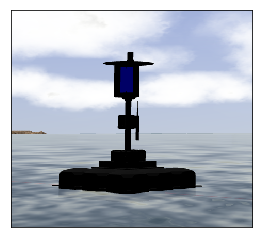

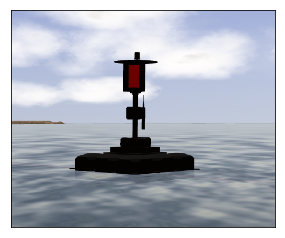

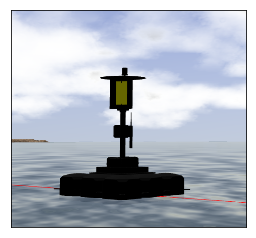

In [4]:
#show the original image
x=0
while x <= n:
    plt.imshow(images[x][...,::-1])
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
    x=x+1

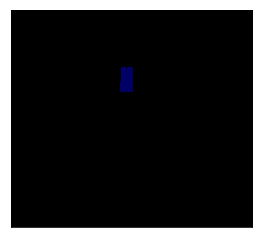

blue


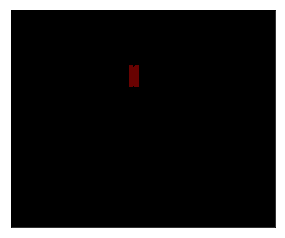

red


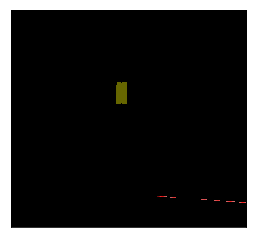

yellow


In [5]:
#convert rgb to HSV
x=0
signal=[]
while x <= n:
    
    #convert RGB to HSV(Hue,Saturation,Value)
    hsv = cv2.cvtColor(images[x], cv2.COLOR_BGR2HSV)
    
    #mask detects color in range of the color bounds
    mask1 = cv2.inRange(hsv, lower_blue, upper_blue)
    mask2 = cv2.inRange(hsv, lower_red, upper_red)
    mask3 = cv2.inRange(hsv, lower_yellow, upper_yellow)
    
    #chooses mask in range
    mask = cv2.bitwise_or(mask1,cv2.bitwise_or(mask2,mask3))
    
    #Results
    res = cv2.bitwise_and(images[x],images[x], mask= mask)
    
    #show results
    plt.imshow(res[...,::-1])
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
   
    #if any mask are ...
    if mask1.any()==True:
        color = "blue"      #color is blue
        signal.append(x)     #append the list
        signal[x] = "blue"   #add blue to the list
    
    elif mask3.any()==True:
        color = "yellow"    #color is yellow
        signal.append(x)     #append
        signal[x] = "yellow" #add yellow to the list 
    
    elif mask2.any()==True: 
        color = "red"        
        signal.append(x)
        signal[x] = "red"
    
    #print the color
    print(color)
    
    x=x+1

In [6]:
#list the signal
signal

['blue', 'red', 'yellow']